In [1]:
import os
print(os.getcwd())

D:\code\opencv\pyqt_project


QPixmap与QImage的区别:

QPixmap依赖于硬件，QImage不依赖于硬件。

QPixmap主要是用于绘图，针对屏幕显示而最佳化设计，QImage主要是为图像I/O、图片访问和像素修改而设计的。
当图片小的情况下，直接用QPixmap进行加载，画图时无所谓，当图片大的时候如果直接用QPixmap进行加载，会占很大的内存，一般一张几十K的图片，用QPixmap加载进来会放大很多倍，所以一般图片大的情况下，用QImage进行加载，然后转乘QPixmap用户绘制。QPixmap绘制效果是最好的。

Qpixmap用法:(转自http://blog.csdn.net/caihuisinx/article/details/7343916)

我想qt 中QPixmap这个类大家都很熟悉，它可以很简单的在标签上贴图；例如：

QPixmap p;

p.load(“1.png”)；

label->setPixmap§;

就这么简单，但是我今天突然发现个问题，就是：

QPixmap p;

p.load(“1.png”)；

label->setPixmap§;

p.load(“2.png”);

label->setPixmap§;

p.load(“1.png”)；

label->setPixmap§;

当用同一个p，即全局变量时，你加载图片1，显示图片1；再加载图片2，显示图片2；可当你再想变回图片一时，你再加载图片一，不好使了，变不回来了，还是显示图片二，你在加载个图片三，好使，再想变回图片二，不好使了。。。。。。

这是为神马呢？？？

原来，p.load（）是将图片加载到缓冲区中：QPixmapCache，当你加载图片二是，图片一并没有被覆盖，此时缓冲区内有图片一和图片二，当你再次加载图片一时，以为缓冲区里应经有了，所以p.load()，直接返回true；但是图片仍是图片二，所以不能显示回图片一！

解决办法很简单，有三种办法：

一、 直接定义局部变量，这样每次都是新的缓冲区；

二、 当再次加载图片时，先将缓冲区清空， QPixmapCache::clear();然后再加载；

三、 在初始化函数里写：QPixmapCache::setCacheLimit(1);设置缓冲区内只能放一张图片，这样就会替换原来的图片，就可以加载新的图片了！

Gamma变换就是用来图像增强，其提升了暗部细节，简单来说就是通过非线性变换，让图像从暴光强度的线性响应变得更接近人眼感受的响应，即将漂白（相机曝光）或过暗（曝光不足）的图片，进行矫正。

 人眼对外界光源的感光值与输入光强不是呈线性关系的，而是呈指数型关系的。在低照度下，人眼更容易分辨出亮度的变化，随着照度的增加，人眼不易分辨出亮度的变化。而摄像机感光与输入光强呈线性关系。如图2所示：

可以观察到，未经Gamma变换的情况下，低灰度时，有较大范围的灰度值被保存成同一个值，造成信息丢失；同时高灰度值时，很多比较接近的灰度值却被保存成不同的值，造成空间浪费。经过Gamma变换后，改善了存储的有效性和效率。

三、Gamma变换的基本形式

大于1时，对图像的灰度分布直方图具有拉伸作用（使灰度向高灰度值延展），而小于1时，对图像的灰度分布直方图具有收缩作用（是使灰度向低灰度值方向靠拢）。

In [2]:
def adjust_gamma(imgs, gamma=1.0):
    assert (len(imgs.shape)==4)  #4D arrays
    assert (imgs.shape[1]==1)  #check the channel is 1
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    new_imgs = np.empty(imgs.shape)
    for i in range(imgs.shape[0]):
        new_imgs[i,0] = cv2.LUT(np.array(imgs[i,0], dtype = np.uint8), table)
    return new_imgs


# LUT

原理见:https://blog.csdn.net/weixin_42171170/article/details/94473176

打印文档：print(cv2.LUT.__doc__)

In [6]:
__Author__ = "Shliang"
__Email__ = "shliang0603@gmail.com"

import numpy as np
import cv2

def adjust_brightness(img_path, brightness_factor):

    img = cv2.imread(img_path)

    # clip(0, 255)会把处理后的像素值的大小，现在在[0, 255]范围内，如果有值大于255则取255,如果有值小于0则取值0
    table = np.array([i * brightness_factor for i in range (0,256)]).clip(0,255).astype('uint8')

    # 单通道img
    if img.shape[2] == 1:
        return cv2.LUT(img, table)[:,:,np.newaxis]
    # 多通道img
    else:
        result = cv2.LUT(img, table)
        # 左边原图、右边增加亮度后的图
        imgs_hstack = np.hstack((img, result))
        cv2.imwrite("adjust_brightness_result.png", imgs_hstack)
        cv2.imshow("result", imgs_hstack)
        cv2.waitKey(0)
        return result


if __name__ == '__main__':
    adjust_brightness("./img.png", brightness_factor=1.5)

AttributeError: 'NoneType' object has no attribute 'shape'

LUT见链接:https://blog.csdn.net/weixin_41010198/article/details/111634487

# np.empty

np.empty() 函数语法如下： 

empty(shape[, dtype, order]) 

依给定的shape, 和数据类型 dtype,  返回一个一维或者多维数组，数组的元素不为空，为随机产生的数据。 

其中参数解释如下：

shape： 整数或者整型元组定义的返回数组的形状。 

dtype：数据类型， 定义返回数组的类型，可选。 如dtype = int

order: {'C',  'F'}, 规定返回数组元素在内存的存储顺序。 可选。C - rowmajor ; F - columnmajor

如下例所示，输出一个3x3的浮点数组。

作者：千足下
链接：https://www.jianshu.com/p/8c4a45137145


# assert

我一直以为 assert 仅仅是个报错函数，事实上，它居然是个宏，并且作用并非"报错"。

在经过对其进行一定了解之后，对其作用及用法有了一定的了解，assert() 的用法像是一种"契约式编程"，在我的理解中，其表达的意思就是，程序在我的假设条件下，能够正常良好的运作，其实就相当于一个 if 语句：

In [4]:
#原型
#include "assert.h" 
void assert( int expression );

assert 的作用是现计算表达式 expression ，如果其值为假（即为0），那么它先向 stderr 打印一条出错信息,然后通过调用 abort 来终止程序运行。

使用 assert 的缺点是，频繁的调用会极大的影响程序的性能，增加额外的开销。

在调试结束后，可以通过在包含 #include 的语句之前插入 #define NDEBUG 来禁用 assert 调用，示例代码如下：

程序一般分为Debug 版本和Release 版本，Debug 版本用于内部调试，Release 版本发行给用户使用。断言assert 是仅在Debug 版本起作用的宏，它用于检查"不应该"发生的情况。以下是一个内存复制程序，在运行过程中，如果assert 的参数为假，那么程序就会中止（一般地还会出现提示对话，说明在什么地方引发了assert）。

以下是使用断言的几个原则：

（1）使用断言捕捉不应该发生的非法情况。不要混淆非法情况与错误情况之间的区别，后者是必然存在的并且是一定要作出处理的。
（2）使用断言对函数的参数进行确认。
（3）在编写函数时，要进行反复的考查，并且自问："我打算做哪些假定？"一旦确定了的假定，就要使用断言对假定进行检查。
（4）一般教科书都鼓励程序员们进行防错性的程序设计，但要记住这种编程风格会隐瞒错误。当进行防错性编程时，如果"不可能发生"的事情的确发生了，则要使用断言进行报警。
ASSERT ()是一个调试程序时经常使用的宏，在程序运行时它计算括号内的表达式，如果表达式为FALSE (0), 程序将报告错误，并终止执行。如果表达式不为0，则继续执行后面的语句。这个宏通常原来判断程序中是否出现了明显非法的数据，如果出现了终止程序以免导致严重后果，同时也便于查找错误。

ASSERT 只有在 Debug 版本中才有效，如果编译为 Release 版本则被忽略。

灰度共生矩阵:https://blog.csdn.net/kmsj0x00/article/details/79463376

# math.radians

In [9]:
#!/usr/bin/python
# 把角度转为弧度
import math

print( "radians(90):",  math.radians(90))
print ("radians(45):",  math.radians(45))
print ("radians(30):",  math.radians(30))

radians(90): 1.5707963267948966
radians(45): 0.7853981633974483
radians(30): 0.5235987755982988


argparse模块是命令行参数需要用的，教程见：https://zhuanlan.zhihu.com/p/56922793

interpolation:插值方法.
在opencv中提供了5中插值方式:
INTER_NEAREST:最邻近插值
INTER_LINEAR:双线性插值,默认情况下使用该方式进行插值.
INTER_AREA:基于区域像素关系的一种重采样或者插值方式.该方法是图像抽取的首选方法,它可以产生更少的波纹,但是当图像放大时,它的效果与INTER_NEAREST效果相似.
INTER_CUBIC:4×4邻域双3次插值
INTER_LANCZOS4:8×8邻域兰索斯插值

np.mat()转换为numpy的矩阵。详情见：https://www.cnblogs.com/lfri/p/10561914.html

# git克隆部分代码

In [ ]:
#克隆部分代码#博客代码
git clone \
  --depth 1 \
  --filter=blob:none \
  --no-checkout \
  https://github.com/cirosantilli/test-git-partial-clone \ # 仓库地址
;
cd test-git-partial-clone 
git checkout master -- d1 #这里的d1指的是文件或者目录

上述方法未尝试成功。

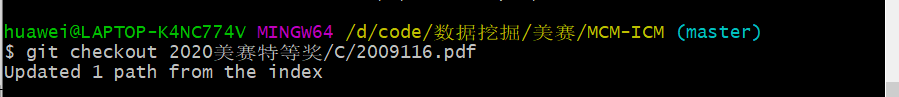

上面一个把git checkout命令稍微换了下，结果莫名成功了。

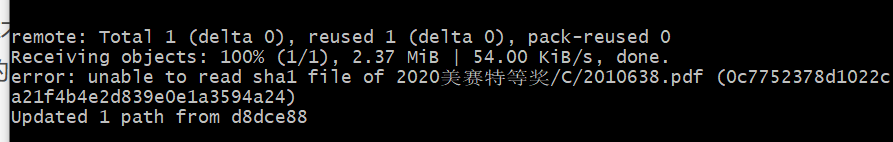

上面是在按照博客中的git checkout那一步操作，出现了unable to read sha1 file，和git原理有关，当然还是不懂。

# git pull部分仓库

In [ ]:
mkdir gitSparse
  cd gitSparse/
  git init
  git remote add -f origin https://github.com/bestswifter/MySampleCode.git#指定非稀疏模式
  ls
  git config core.sparsecheckout true
  echo "CornerRadius" >> .git/info/sparse-checkout
  cat ./.git/info/sparse-checkout 
  git pull origin  master
#git remote add 那里连接非常慢

# interrows

iterrows() 是在数据框中的行进行迭代的一个生成器，它返回每行的索引及一个包含行本身的对象。

所以，当我们在需要遍历行数据的时候，就可以使用 iterrows()方法实现了。

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
for index, row in df.iterrows():
    print(index)
    print(row)

0
A   -0.065543
B    2.287660
C   -0.867007
D   -0.784018
Name: 0, dtype: float64
1
A   -0.495103
B    0.709238
C   -0.356686
D    1.233563
Name: 1, dtype: float64
2
A   -0.906064
B    0.368039
C   -0.953994
D    0.297972
Name: 2, dtype: float64
3
A   -0.836427
B    0.706741
C    1.161972
D    0.053469
Name: 3, dtype: float64
4
A   -0.681109
B   -0.957967
C    0.354704
D   -1.079361
Name: 4, dtype: float64
5
A   -1.907472
B   -0.784650
C    0.635387
D   -0.834821
Name: 5, dtype: float64
6
A   -0.953315
B   -0.241864
C   -1.767725
D   -1.428579
Name: 6, dtype: float64
7
A   -1.424574
B   -0.229855
C   -1.757453
D   -1.582812
Name: 7, dtype: float64
8
A   -0.587803
B    0.218100
C    0.466952
D   -0.050412
Name: 8, dtype: float64
9
A   -0.890334
B   -0.525052
C   -0.047488
D    1.422225
Name: 9, dtype: float64


# ix

.ix我发现，上面两种用法他都可以，它既可以根据行列标签又可以根据行列数，比如拿到5

In [4]:
# data.ix[1:3,1:3]
# data.ix['b':'c','B':'C']

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\python37\python.exe -m pip install --upgrade pip' command.
